In [130]:
# data analysis

import pandas as pd
import numpy as np
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#library configuration
%matplotlib inline

# For preprocessing & feature selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2


# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [131]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [132]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Categorical columns
Categorical columns are represented by nominal, ordinal, ratio, boolean or interval values.

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name
Numerical columns
Some columns have discrete, continuous, or time based values.

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck

In [133]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [135]:
train.shape

(8693, 14)

In [136]:
train.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [137]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [138]:
train['TotalExp'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [139]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand = True)
test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand = True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


In [140]:
train[['PassengerGrp', 'PassengerNum']] = train['PassengerId'].str.split('_', expand = True).astype(int)
test[['PassengerGrp', 'PassengerNum']] = test['PassengerId'].str.split('_', expand = True).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,4,1


In [141]:
for col in train.columns:
    print(f'{col} ---------> {train[col].nunique()}')

PassengerId ---------> 8693
HomePlanet ---------> 3
CryoSleep ---------> 2
Cabin ---------> 6560
Destination ---------> 3
Age ---------> 80
VIP ---------> 2
RoomService ---------> 1273
FoodCourt ---------> 1507
ShoppingMall ---------> 1115
Spa ---------> 1327
VRDeck ---------> 1306
Name ---------> 8473
Transported ---------> 2
TotalExp ---------> 2116
CabinDeck ---------> 8
CabinNum ---------> 1817
CabinSide ---------> 2
PassengerGrp ---------> 6217
PassengerNum ---------> 8


In [142]:
for col in test.columns:
    print(f'{col} ---------> {test[col].nunique()}')

PassengerId ---------> 4277
HomePlanet ---------> 3
CryoSleep ---------> 2
Cabin ---------> 3265
Destination ---------> 3
Age ---------> 79
VIP ---------> 2
RoomService ---------> 842
FoodCourt ---------> 902
ShoppingMall ---------> 715
Spa ---------> 833
VRDeck ---------> 796
Name ---------> 4176
CabinDeck ---------> 8
CabinNum ---------> 1505
CabinSide ---------> 2
PassengerGrp ---------> 3063
PassengerNum ---------> 8


In [143]:
num_features = train.select_dtypes(exclude = ['object', 'bool']).columns.tolist()
train[num_features].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,PassengerGrp,PassengerNum
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,2,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,3,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,3,2
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,4,1


In [144]:
cat_features = train.select_dtypes(include = ['object']).columns.tolist()
train[cat_features].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,F,1,S


In [145]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,PassengerGrp,PassengerNum
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541,4633.389624,1.517773
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241,2671.028856,1.054241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000,4630.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000,6883.000000,2.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,9280.000000,8.000000


In [146]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S,4,1


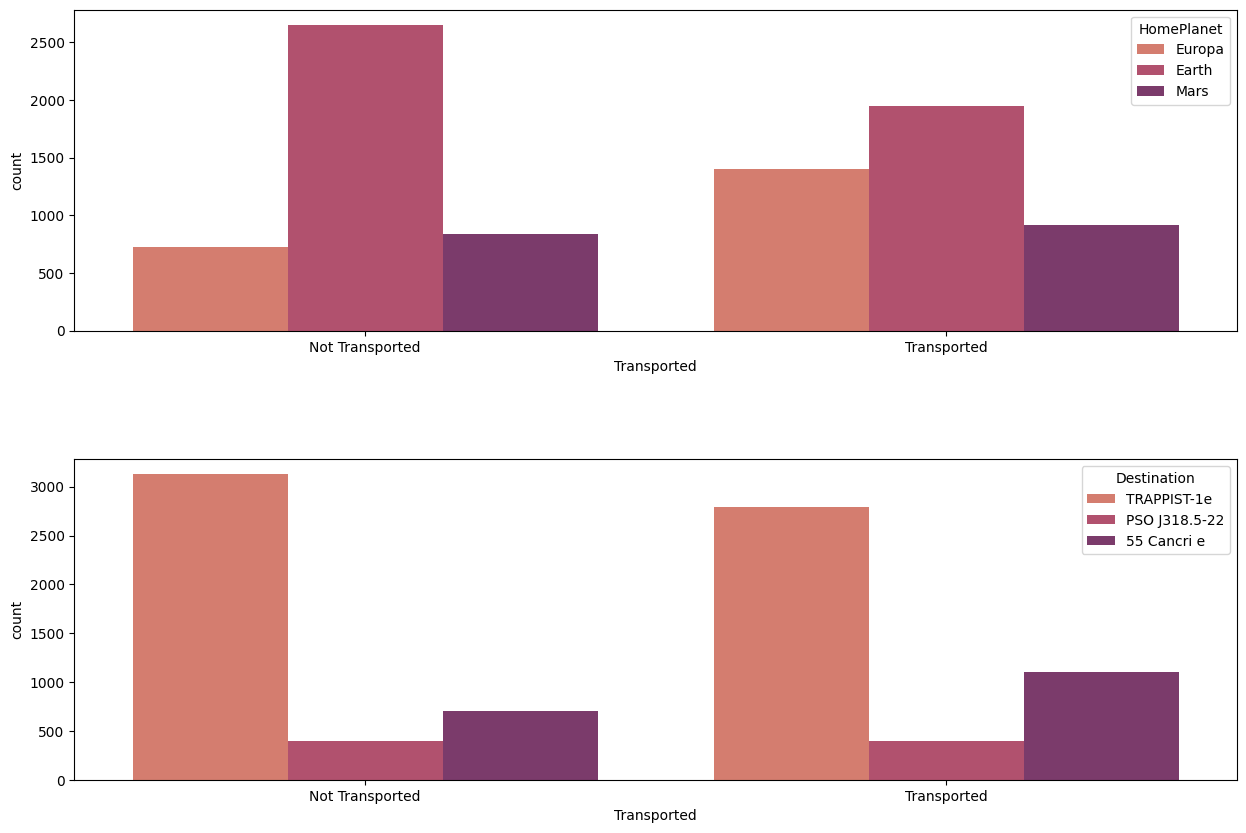

In [147]:
transported_df = train.copy()

transported_df['Transported'] = transported_df['Transported'].map({True : 'Transported', 
                                                                   False : 'Not Transported'})

feat_cat = ['HomePlanet', 'Destination']

fig, axes = plt.subplots(2, 1, figsize=(15,10))
fig.subplots_adjust(hspace=0.4)
i = 0
for triaxis in axes:
    sns.countplot(data = transported_df, x = 'Transported',
                hue = transported_df[feat_cat[i]], 
                palette = 'flare', ax = triaxis)
  
    i = i + 1

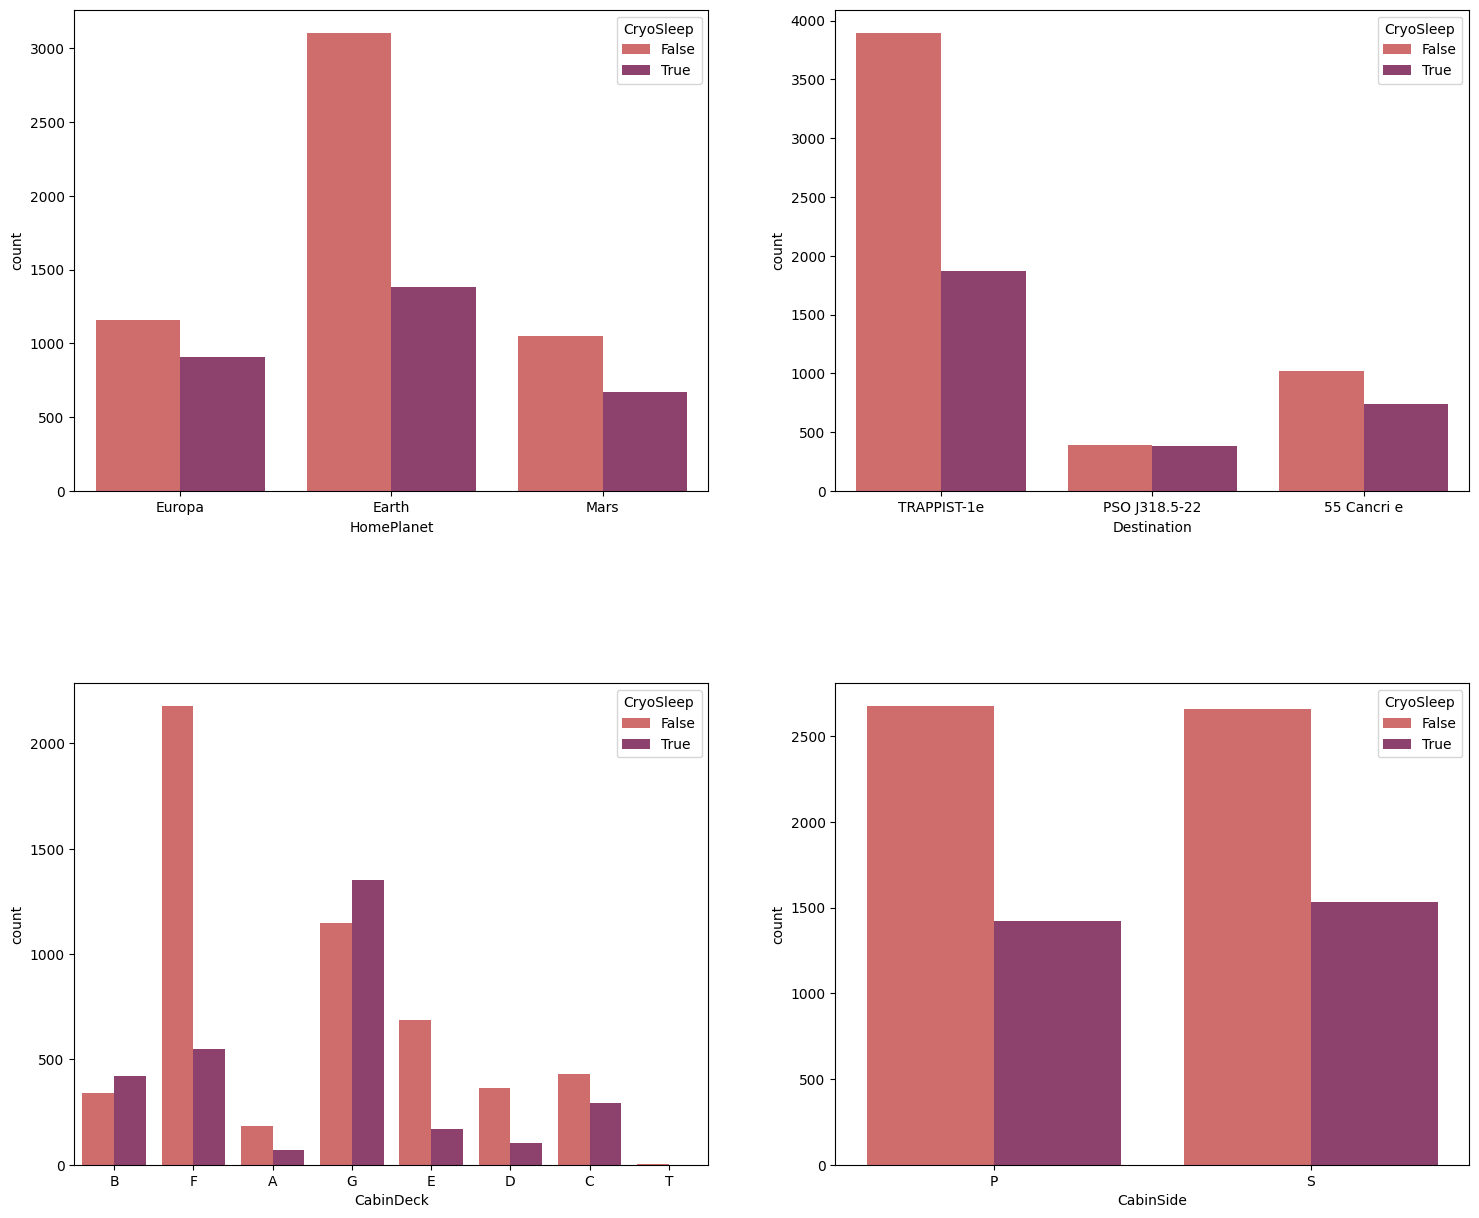

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(18,15))
fig.subplots_adjust(hspace=0.4)
feat_cat = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.countplot(data = transported_df, x = train[feat_cat[i]],
                      hue = 'CryoSleep', 
                      palette = 'flare', ax = axis)
        i = i + 1

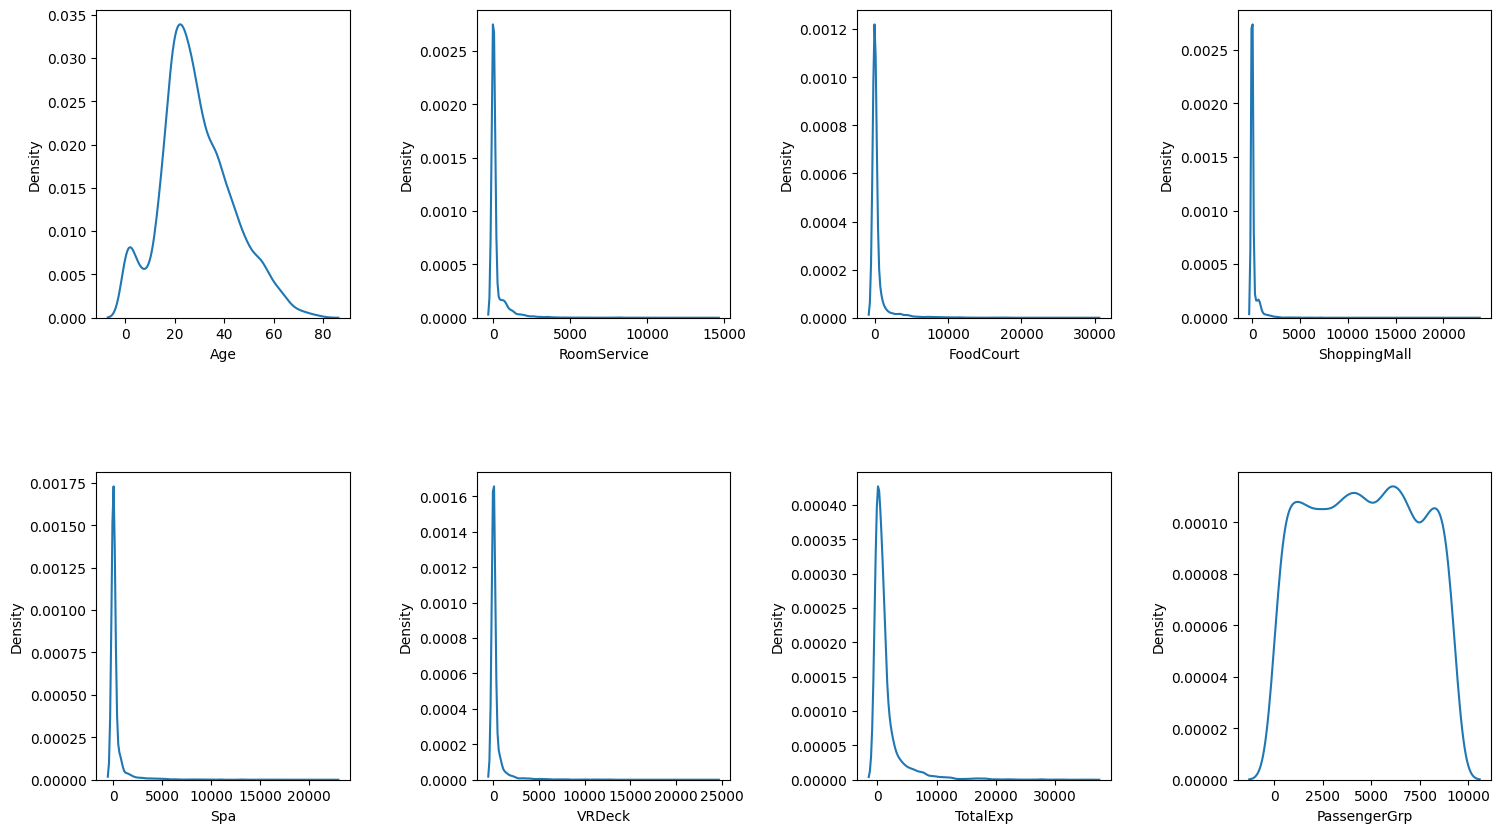

In [149]:
fig, axes = plt.subplots(len(train[num_features].columns)//4, 4, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.5)
for triaxis in axes:
    for axis in triaxis:
        sns.kdeplot(data = train[num_features[i]], ax = axis)
        i = i+1

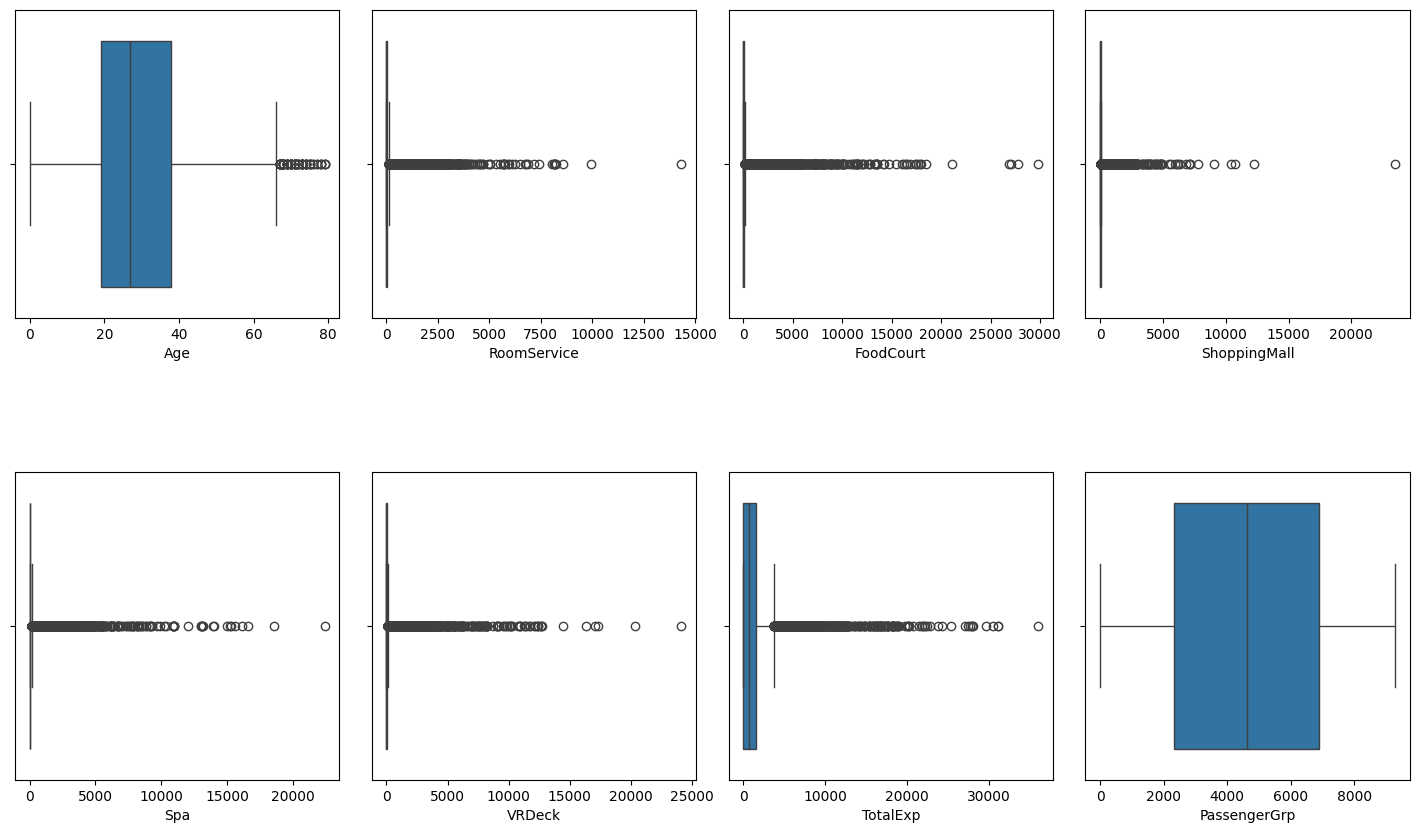

In [150]:
fig, axes = plt.subplots(len(train[num_features].columns)//4, 4, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.1)
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x = train[num_features[i]], ax = axis)
        i = i+1

/tmp/ipykernel_2234/354608276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train, x = train[categorical[i]],
/tmp/ipykernel_2234/354608276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train, x = train[categorical[i]],
/tmp/ipykernel_2234/354608276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train, x = train[categorical[i]],
/tmp/ipykernel_2234/354608276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

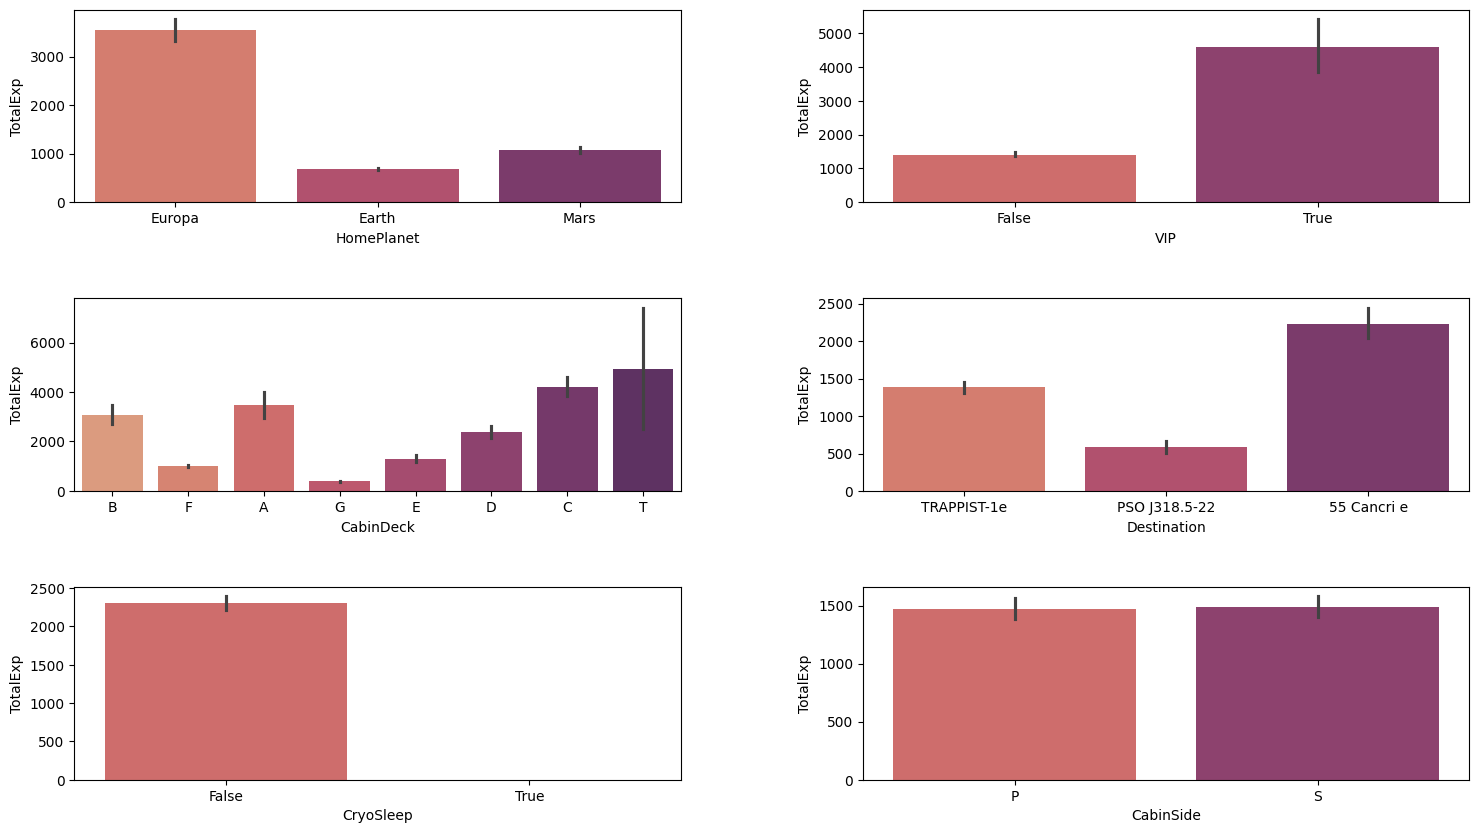

In [151]:
categorical = ['HomePlanet', 'VIP', 'CabinDeck', 
               'Destination', 'CryoSleep', 'CabinSide']

fig, axes = plt.subplots(len(train[num_features].columns)//3, 2, figsize = (18, 10))
i = 0
fig.subplots_adjust(hspace=0.5,
                    wspace = 0.3)
for triaxis in axes:
    for axis in triaxis:
        sns.barplot(data = train, x = train[categorical[i]],
                    y = 'TotalExp', ax = axis, palette = 'flare')
        i = i+1

Decisisions

Create new features using Feature engineering.
Consider on including the features 'HomePlanet', 'Destination, 'CabinDeck', 'VIP', 'CryoSleep', and 'CabinSide.'

In [152]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
TotalExp        float64
CabinDeck        object
CabinNum         object
CabinSide        object
PassengerGrp      int64
PassengerNum      int64
dtype: object

In [153]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
TotalExp        908
CabinDeck       199
CabinNum        199
CabinSide       199
PassengerGrp      0
PassengerNum      0
dtype: int64

In [154]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
TotalExp        908
CabinDeck       199
CabinNum        199
CabinSide       199
PassengerGrp      0
PassengerNum      0
dtype: int64

In [155]:
train[num_features].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
TotalExp        908
PassengerGrp      0
PassengerNum      0
dtype: int64

In [156]:
for col in num_features:
    train[col] = train[col].fillna(train[col].median())

train[num_features].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalExp        0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [157]:
test['TotalExp'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test[num_features].isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
TotalExp        455
PassengerGrp      0
PassengerNum      0
dtype: int64

In [158]:
for col in num_features:
    test[col] = test[col].fillna(test[col].median())

test[num_features].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalExp        0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [159]:
train[cat_features].isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
CabinDeck      199
CabinNum       199
CabinSide      199
dtype: int64

In [160]:
for col in cat_features:
    train[col] = train[col].fillna(train[col].mode()[0])

train['CabinNum'] = train['CabinNum'].astype(int)
train[cat_features].isnull().sum()

/tmp/ipykernel_2234/684070351.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(train[col].mode()[0])


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
CabinDeck      0
CabinNum       0
CabinSide      0
dtype: int64

In [161]:
test[cat_features].isnull().sum()
for col in cat_features:
    test[col] = test[col].fillna(test[col].mode()[0])

test['CabinNum'] = test['CabinNum'].astype(int)
test[cat_features].isnull().sum()

/tmp/ipykernel_2234/1541867192.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[col] = test[col].fillna(test[col].mode()[0])


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
CabinDeck      0
CabinNum       0
CabinSide      0
dtype: int64

In [162]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
TotalExp        0
CabinDeck       0
CabinNum        0
CabinSide       0
PassengerGrp    0
PassengerNum    0
dtype: int64

In [163]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
CabinDeck       0
CabinNum        0
CabinSide       0
PassengerGrp    0
PassengerNum    0
TotalExp        0
dtype: int64

In [164]:
drop_col = ['Cabin', 'Name']
train = train.drop(columns = drop_col)
test = test.drop(columns = drop_col)

In [165]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,0,S,2,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,0,S,3,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,A,0,S,3,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,1,S,4,1


In [166]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum,TotalExp
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,13,1,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,18,1,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,19,1,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,21,1,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,23,1,645.0


In [167]:
X = train.drop(columns = ['Transported'])
y = train[['PassengerId', 'Transported']]

In [168]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinDeck,CabinNum,CabinSide,PassengerGrp,PassengerNum
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,F,0,S,2,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,A,0,S,3,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,A,0,S,3,2
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,F,1,S,4,1


In [169]:
y.head()

,PassengerId,Transported
0,0001_01,False
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True


In [170]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

le = LabelEncoder()
categories = ['HomePlanet', 'CryoSleep', 'Destination',
              'VIP', 'CabinDeck', 'CabinSide']
encoded_ = []
test_enc = []

for col in categories:
    X_encoded = le.fit_transform(X[col])
    test_encoded = le.fit_transform(test[col])
    encoded_.append(X_encoded)
    test_enc.append(test_encoded)

df_encoded = pd.DataFrame({'HomePlanet_': encoded_[0],
                           'Is_CryoSleep': encoded_[1],
                           'Destination_': encoded_[2],
                           'Is_VIP': encoded_[3],
                           'CabinDeck_': encoded_[4],
                           'CabinSide_': encoded_[5]})

df_test_encoded = pd.DataFrame({'HomePlanet_': test_enc[0],
                           'Is_CryoSleep': test_enc[1],
                           'Destination_': test_enc[2],
                           'Is_VIP': test_enc[3],
                           'CabinDeck_': test_enc[4],
                           'CabinSide_': test_enc[5]})

X = pd.concat([X, df_encoded], axis = 1)
X.drop(columns = categories, inplace = True)
test = pd.concat([test, df_test_encoded], axis = 1)
test.drop(columns = categories, inplace = True)
X.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinNum,PassengerGrp,PassengerNum,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,2,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,0,2,1,0,0,2,0,5,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,3,1,1,0,2,1,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,3,2,1,0,2,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,4,1,0,0,2,0,5,1


In [171]:
y_encoded = le.fit_transform(y['Transported'])
df_encoded = pd.DataFrame({'Transported_enc': y_encoded})
y = pd.concat([y, df_encoded], axis = 1)
y = y.drop(columns = ['Transported'])
y.head()

,PassengerId,Transported_enc
0,0001_01,0
1,0002_01,1
2,0003_01,0
3,0003_02,0
4,0004_01,1


In [172]:
index_ = ['PassengerId']
X = X.set_index(index_)
y = y.set_index(index_)

In [173]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp,CabinNum,PassengerGrp,PassengerNum,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
PassengerId,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,2,0,1,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,0,2,1,0,0,2,0,5,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,3,1,1,0,2,1,0,1
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,3,2,1,0,2,0,0,1
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1,4,1,0,0,2,0,5,1


In [174]:
y.head()

,Transported_enc
PassengerId,
0001_01,0
0002_01,1
0003_01,0
0003_02,0
0004_01,1


In [175]:
test.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,PassengerGrp,PassengerNum,TotalExp,HomePlanet_,Is_CryoSleep,Destination_,Is_VIP,CabinDeck_,CabinSide_
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,3,13,1,0.0,0,1,2,0,6,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,4,18,1,2832.0,0,0,2,0,5,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,19,1,0.0,1,1,0,0,2,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,21,1,7418.0,1,0,2,0,2,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,23,1,645.0,0,0,2,0,5,1


In [176]:
test = test.copy()
test = test.drop(columns = ['PassengerId'])

scaler = StandardScaler(with_mean = False, with_std = True)
scaled_ = scaler.fit_transform(X)
scaled_test = scaler.fit_transform(test)
scaled_ = pd.DataFrame(scaled_, columns = X.columns)
scaled_test = pd.DataFrame(scaled_test, columns = test.columns)
# scaled_.head()

In [177]:
poly_ = PolynomialFeatures(include_bias = False)
scaled_ = poly_.fit_transform(scaled_)
scaled_ = pd.DataFrame(scaled_)
scaled_.shape

(8693, 152)

In [178]:
poly_ = PolynomialFeatures(include_bias = False)
scaled_test = poly_.fit_transform(scaled_test)
scaled_test = pd.DataFrame(scaled_test)
scaled_test.shape

(4277, 152)

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(scaled_, y, test_size = 0.33,
                                                    random_state = 101)

In [180]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, np.ravel(y_train))

LogisticRegression(solver='liblinear')

In [181]:
predicted = log_reg.predict(X_test)

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1429
           1       0.79      0.81      0.80      1440

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869



In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print(f"The model's accuracy score is {round(accuracy_score(y_test, predicted)*100, 2)}%")

The model's accuracy score is 79.71%


/home/codespace/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: xlabel='Predicted', ylabel='Actual'>

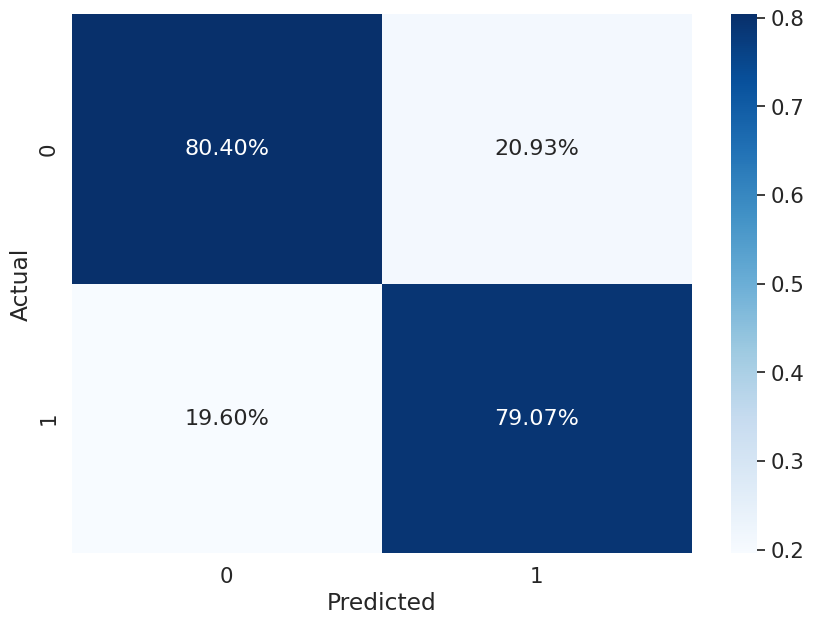

In [184]:
data = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(predicted))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm/np.sum(df_cm), cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = '.2%')

El modelo tiene una puntuación de precisión del 81% para predecir si una persona es transportada.

El modelo también tiene una puntuación de recuerdo del 81%, lo que significa la prevalencia del modelo en la predicción de si una persona es transportada.

Dado que la precisión y la recuperación tienen la misma puntuación, la puntuación F1 también tiene una puntuación del 81%, que es el promedio ponderado de la recuperación y la precisión.

La precisión general del modelo es del 80,52%.